# Store Sales Data Analysis – Introduction

This dataset (`train.csv`) contains **daily sales data** from multiple stores and product families of a retail company. Each record captures the number of units sold on a specific date, along with details of the store, product category, and whether items were on promotion.  

### Dataset Description
- **date** → Date of the sales transaction.  
- **store_nbr** → Identifier of the store.  
- **family** → Product category (e.g., beverages, groceries, etc.).  
- **sales** → Units sold for the given store and product family.  
- **onpromotion** → Number of promotional items available.  

### Project Objective
The purpose of this project is to analyze sales behavior and identify meaningful trends across time, stores, and product families. Specifically, we will:  
1. Perform **data cleaning, preparation, and descriptive statistics**.  
2. Analyze **daily sales trends** and highlight patterns using line charts.  
3. Study **seasonality effects** such as sales by weekday and month.  
4. Evaluate **store-level performance** and compare average sales across locations.  
5. Analyze **product family performance** to identify high and low demand categories.  
6. Summarize key **insights about sales distribution, promotions, and demand patterns**.  

This exploratory analysis provides actionable insights into **seasonal sales trends**, **high-performing stores and categories**, and the **influence of promotions**, supporting better **forecasting, marketing, and inventory planning**.  


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
train = pd.read_csv(r"C:\Users\lab210\Documents\train.csv")

print("Shape of train dataset:", train.shape)
train.head()

Shape of train dataset: (3000888, 6)


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [41]:
train.info()
print("\nMissing values per column:\n", train.isnull().sum())
print("\nDuplicate rows:", train.duplicated().sum())

# Convert 'date' column to datetime
train["date"] = pd.to_datetime(train["date"])

# Sort by date
train = train.sort_values("date").reset_index(drop=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB

Missing values per column:
 id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Duplicate rows: 0


In [42]:
print(train['sales'].describe())

# Calculate mean, median, and mode
mean_sales = train['sales'].mean()
median_sales = train['sales'].median()
mode_sales = train['sales'].mode()[0]

print(f"Mean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Mode Sales: {mode_sales}")


count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64
Mean Sales: 357.7757491126188
Median Sales: 11.0
Mode Sales: 0.0


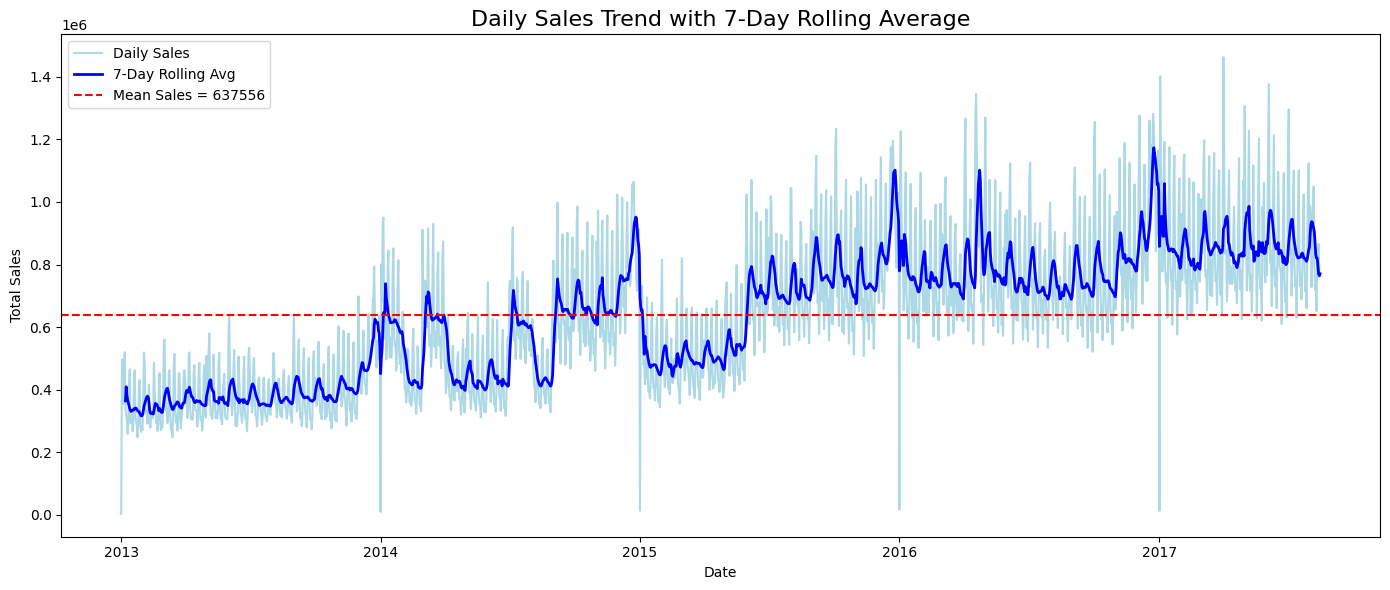

In [32]:
train["date"] = pd.to_datetime(train["date"])

daily_sales = train.groupby("date")["sales"].sum().reset_index()
daily_sales["rolling_7"] = daily_sales["sales"].rolling(window=7).mean()

plt.figure(figsize=(14,6))
sns.lineplot(x="date", y="sales", data=daily_sales, color="lightblue", label="Daily Sales")
sns.lineplot(x="date", y="rolling_7", data=daily_sales, color="blue", linewidth=2, label="7-Day Rolling Avg")

mean_sales = daily_sales["sales"].mean()
plt.axhline(mean_sales, color="red", linestyle="--", linewidth=1.5, label=f"Mean Sales = {mean_sales:.0f}")

plt.title("Daily Sales Trend with 7-Day Rolling Average", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.tight_layout()
plt.show()

### 📈 Insights: Daily Sales Trend with Rolling Average

The chart shows that **daily sales are highly volatile**, with sharp spikes and drops across time. Applying a **7-day rolling average** smooths these fluctuations, making weekly seasonality more visible — sales generally rise toward weekends and dip during midweek.  

There are several **clear spikes above the mean line**, which align with **holidays or promotional campaigns**, showing that sales are strongly influenced by calendar events. Periods below the mean represent off-season demand. Overall, the chart highlights that sales are **event-driven, seasonal, and not evenly distributed across time**, which is critical for planning inventory, staffing, and marketing campaigns.  


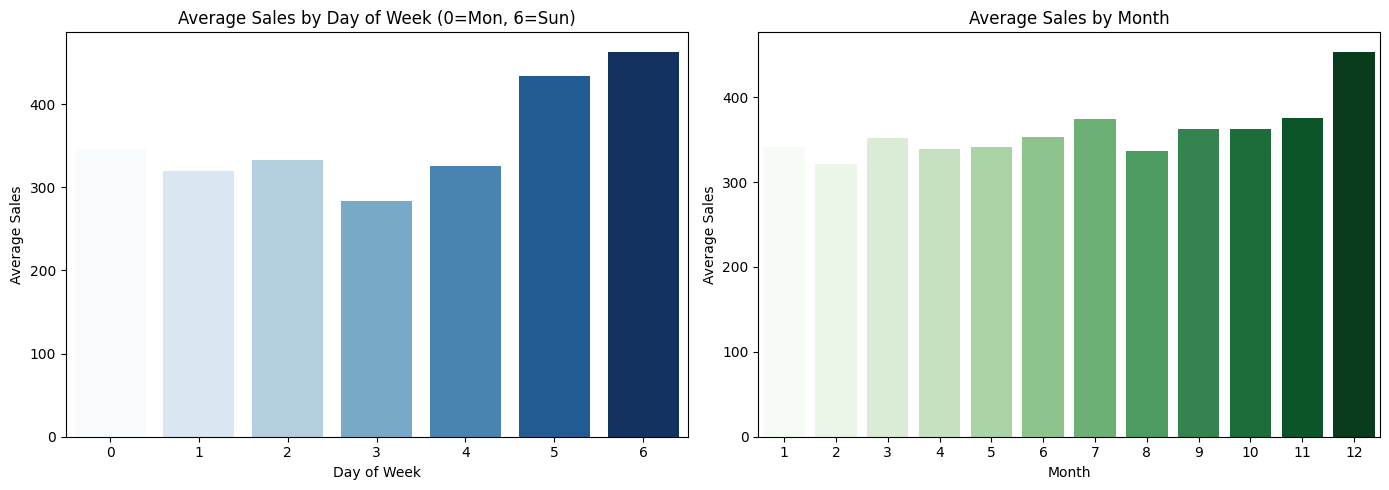

In [17]:
train["date"] = pd.to_datetime(train["date"])

train["year"] = train["date"].dt.year
train["month"] = train["date"].dt.month
train["dayofweek"] = train["date"].dt.dayofweek  

fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.barplot( x="dayofweek", y="sales", hue="dayofweek", data=train, estimator=np.mean, errorbar=None, palette="Blues",legend=False, ax=axes[0])
axes[0].set_title("Average Sales by Day of Week (0=Mon, 6=Sun)")
axes[0].set_xlabel("Day of Week")
axes[0].set_ylabel("Average Sales")


sns.barplot(x="month", y="sales", hue="month", data=train, estimator=np.mean, errorbar=None, palette="Greens", legend=False, ax=axes[1])
axes[1].set_title("Average Sales by Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Average Sales")

plt.tight_layout()
plt.show()

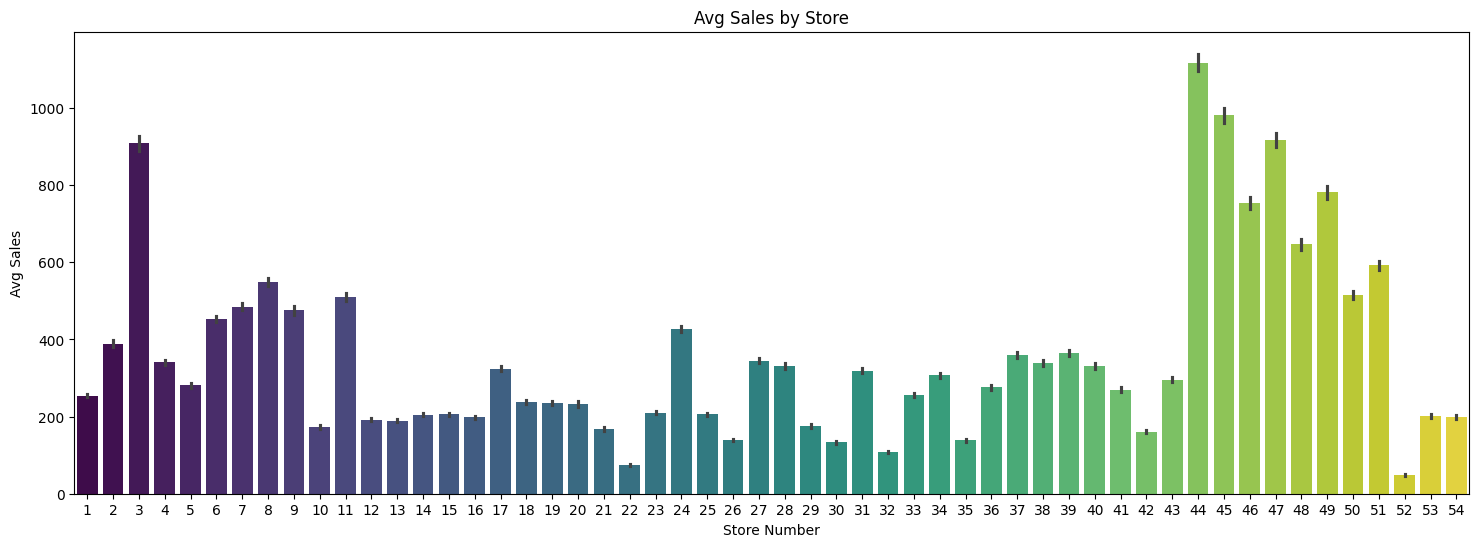

In [43]:
plt.figure(figsize=(18,6))
sns.barplot(x="store_nbr", y="sales",hue="store_nbr", data=train, estimator=np.mean, palette="viridis",legend=False)
plt.title("Avg Sales by Store")
plt.xlabel("Store Number")
plt.ylabel("Avg Sales")
plt.show()

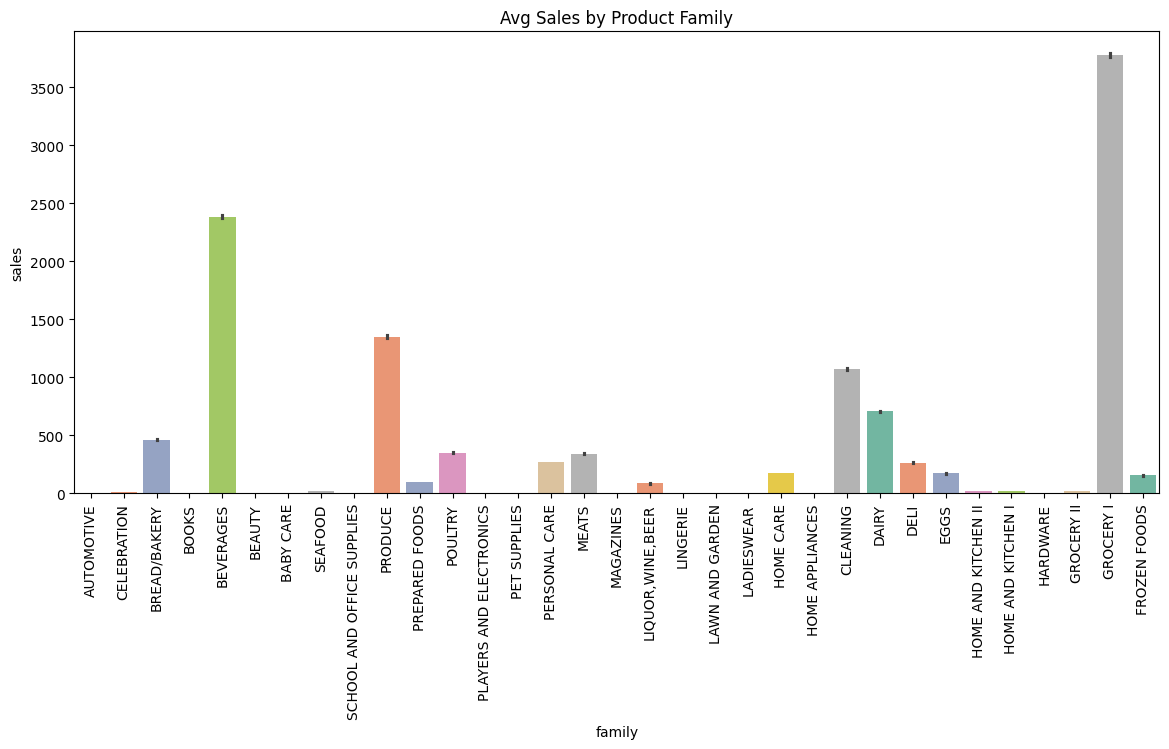

In [30]:
plt.figure(figsize=(14,6))
sns.barplot(x="family", y="sales",hue="family", data=train, estimator=np.mean, palette="Set2",label=False)
plt.title("Avg Sales by Product Family")
plt.xticks(rotation=90)
plt.show()


# Project Summary – Store Sales Data Analysis

### Key Findings
1. **Descriptive Statistics**  
   - Sales data is positively skewed with noticeable outliers.  
   - Mean, median, and mode differ, indicating uneven sales distribution across products and stores.  

2. **Sales Trends**  
   - Daily sales are highly volatile with sharp spikes around promotions and holidays.  
   - A 7-day rolling average highlights weekly seasonality, showing higher sales toward weekends.  
   - The overall trend indicates steady demand but strong reliance on event-driven peaks.  

3. **Seasonality Patterns**  
   - **By Weekday:** Sales peak on weekends, especially Saturday and Sunday.  
   - **By Month:** December shows strong sales due to festive demand, while mid-year months have relatively lower averages.  

4. **Store-Level Analysis**  
   - Sales performance varies widely across stores.  
   - A few stores consistently achieve higher-than-average sales, while some lag behind, suggesting differences in location, foot traffic, or customer base.  

5. **Product Family Analysis**  
   - Certain families such as groceries and beverages generate higher sales, while niche categories contribute less.  
   - Identifying strong and weak product families helps in optimizing product assortment.  
---

### Conclusion
This exploratory data analysis reveals that sales are **seasonal, event-driven, and unevenly distributed across stores and product categories**. Promotions and holidays significantly influence customer demand, while store and product-level differences highlight opportunities for targeted strategies.  

Overall, the insights from this project can support **better sales forecasting, inventory optimization, and marketing campaign planning**, ensuring that the right products are promoted at the right time and place.  
